<a href="https://colab.research.google.com/github/rahelFM/Moonlight-Energy-Optimization/blob/main/compare_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load benin data
df_benin = pd.read_csv('/content/benin-malanville.csv')

In [78]:
# Z-score outlier detection
from scipy.stats import zscore

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Ensure that columns_to_check only contains columns that are actually present in the DataFrame
columns_to_check_existing = [col for col in columns_to_check if col in df.columns]

# Apply zscore only to existing columns
z_scores = df_benin[columns_to_check_existing].apply(zscore)

# Filter the DataFrame based on z-scores, only using the columns that were checked
df_benin_clean = df_benin[(np.abs(z_scores) <= 3).all(axis=1)]

In [79]:
 #Impute missing values (median for numeric)
df_benin_clean.fillna(df_benin_clean.median(numeric_only=True), inplace=True)

<ipython-input-79-f4e6f813807e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benin_clean.fillna(df_benin_clean.median(numeric_only=True), inplace=True)


In [80]:
import os
if not os.path.exists('content'):
    os.makedirs('content')

#Export cleaned file
df_benin_clean.to_csv('content/benin_clean.csv', index=False)

In [81]:
# Load togo data
df_togo = pd.read_csv('/content/togo-dapaong_qc.csv')

In [82]:
# Z-score outlier detection
from scipy.stats import zscore

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
columns_to_check_existing = [col for col in columns_to_check if col in df_togo.columns]

z_scores = df_togo[columns_to_check_existing].apply(zscore)

df_togo_clean = df_togo[(np.abs(z_scores) <= 3).all(axis=1)]

In [83]:
 #Impute missing values (median for numeric)
df_togo_clean.fillna(df_togo_clean.median(numeric_only=True), inplace=True)

<ipython-input-83-f97680829745>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_togo_clean.fillna(df_togo_clean.median(numeric_only=True), inplace=True)


In [84]:
#Export cleaned file
df_togo_clean.to_csv('content/togo_clean.csv', index=False)

In [85]:
# Load serrealeone data
df_serrealeone = pd.read_csv('/content/sierraleone-bumbuna.csv')

In [86]:
# Z-score outlier detection
from scipy.stats import zscore

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
columns_to_check_existing = [col for col in columns_to_check if col in df_serrealeone.columns]

z_scores = df_serrealeone[columns_to_check_existing].apply(zscore)

df_serrealeone_clean = df_serrealeone[(np.abs(z_scores) <= 3).all(axis=1)]

In [87]:
 #Impute missing values (median for numeric)
df_serrealeone_clean.fillna(df_serrealeone_clean.median(numeric_only=True), inplace=True)

<ipython-input-87-42a2693d171b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serrealeone_clean.fillna(df_serrealeone_clean.median(numeric_only=True), inplace=True)


In [88]:
#Export cleaned file
df_serrealeone_clean.to_csv('content/serrealeone_clean.csv', index=False)

In [89]:
# Load Cleaned Datasets
benin_df = pd.read_csv('/content/benin-malanville.csv')
togo_df = pd.read_csv('/content/togo-dapaong_qc.csv')
sl_df = pd.read_csv('/content/sierraleone-bumbuna.csv')

In [90]:
# Add country labels
benin_df['Country'] = 'Benin'
togo_df['Country'] = 'Togo'
sl_df['Country'] = 'Sierra Leone'

In [91]:
# Concatenate all
df_all = pd.concat([benin_df, togo_df, sl_df], ignore_index=True)

In [92]:
# Preview
df_all[['Timestamp', 'Country', 'GHI', 'DNI', 'DHI']].head()

,Timestamp,Country,GHI,DNI,DHI
0,2021-08-09 00:01,Benin,-1.2,-0.2,-1.1
1,2021-08-09 00:02,Benin,-1.1,-0.2,-1.1
2,2021-08-09 00:03,Benin,-1.1,-0.2,-1.1
3,2021-08-09 00:04,Benin,-1.1,-0.1,-1.0
4,2021-08-09 00:05,Benin,-1.0,-0.1,-1.0


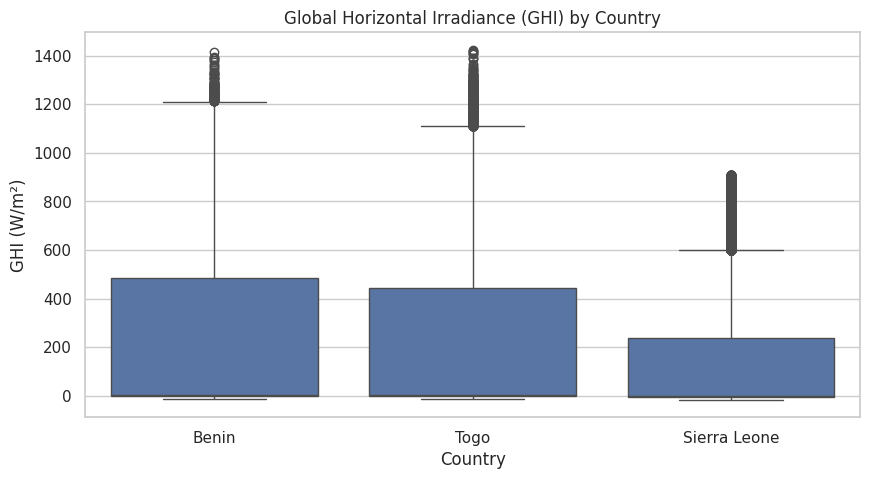

In [93]:
# Set style
sns.set(style="whitegrid")

# Boxplot for GHI
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_all, x='Country', y='GHI')
plt.title('Global Horizontal Irradiance (GHI) by Country')
plt.ylabel('GHI (W/m²)')
plt.show()

Benin has the highest total solar irradiance on horizontal surfaces → most suitable for solar PV installations.

Togo is a close second, also highly suitable.

Sierra Leone receives significantly less total irradiance, possibly due to:

More cloud cover

More humidity

Higher latitude or landscape shading

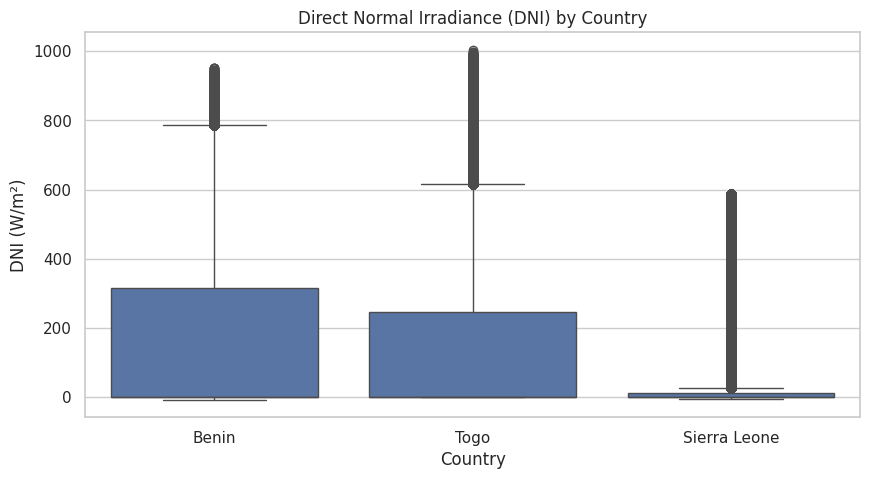

In [94]:
# Boxplot for DNI
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_all, x='Country', y='DNI')
plt.title('Direct Normal Irradiance (DNI) by Country')
plt.ylabel('DNI (W/m²)')
plt.show()

Benin is best for concentrated solar systems (e.g., CSP, sun-tracking PV) due to high DNI and GHI.

Togo offers great potential for fixed systems, shaded installations, or urban PV where diffuse light matters more.

Sierra Leone lags behind in all metrics and may need additional design considerations (e.g., hybrid, battery support).

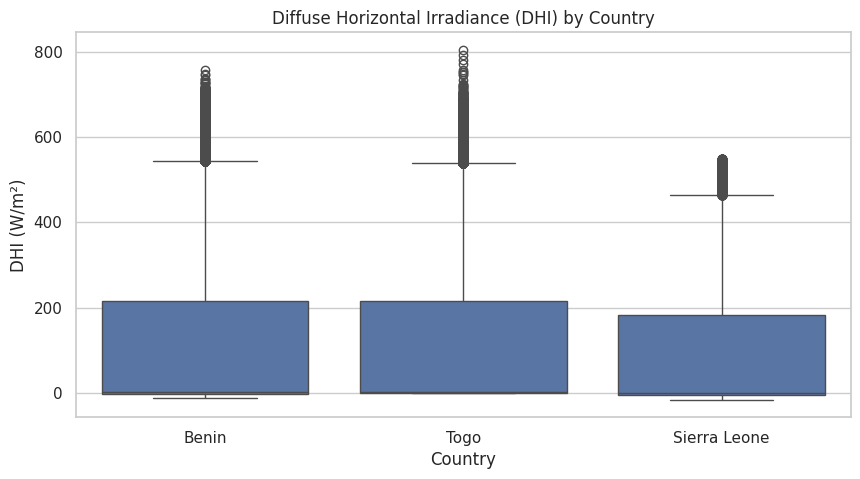

In [95]:
# Boxplot for DHI
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_all, x='Country', y='DHI')
plt.title('Diffuse Horizontal Irradiance (DHI) by Country')
plt.ylabel('DHI (W/m²)')
plt.show()

DHI measures the portion of solar radiation that reaches the Earth's surface after being scattered by molecules and particles in the atmosphere, not directly from the sun.Togo has the highest DHI, slightly higher than Benin.

Sierra Leone has the lowest DHI among the three.

The standard deviations (DHI_std) are quite high, suggesting considerable daily or seasonal variability.

In [96]:
# Define summary metrics
metrics = ['GHI', 'DNI', 'DHI']
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary.columns = ['_'.join(col) for col in summary.columns]
summary

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,240.56,1.8,331.13,167.19,-0.1,261.71,115.36,1.6,158.69
Sierra Leone,139.54,-0.7,228.10,67.17,-0.1,147.14,93.90,-0.9,146.09
Togo,230.56,2.1,322.53,151.26,0.0,250.96,116.44,2.5,156.52


Benin: Best overall solar resource — highest GHI.

Togo: Very good solar potential — high GHI, especially strong DHI (good for cloudy-day performance).

Sierra Leone: Least favorable for solar energy, but still viable with proper design (e.g., hybrid systems).

In [97]:
# One-Way ANOVA for GHI
ghi_benin = benin_df['GHI'].dropna()
ghi_togo = togo_df['GHI'].dropna()
ghi_sl = sl_df['GHI'].dropna()

# Import the stats module from scipy
from scipy import stats

# Use ANOVA (if data is normal) or Kruskal-Wallis (non-parametric)
anova_result = stats.f_oneway(ghi_benin, ghi_togo, ghi_sl)
kruskal_result = stats.kruskal(ghi_benin, ghi_togo, ghi_sl)

print("One-Way ANOVA p-value:", anova_result.pvalue)
print("Kruskal–Wallis p-value:", kruskal_result.pvalue)

One-Way ANOVA p-value: 0.0
Kruskal–Wallis p-value: 0.0


Both p-values are 0.0 (i.e., extremely small), meaning the differences in irradiance between countries are statistically significant.

This confirms that the differences in average solar radiation (like GHI, DNI, DHI) are not due to random variation — the countries genuinely differ in solar energy potential.

<ipython-input-98-256a5bb84af7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis")


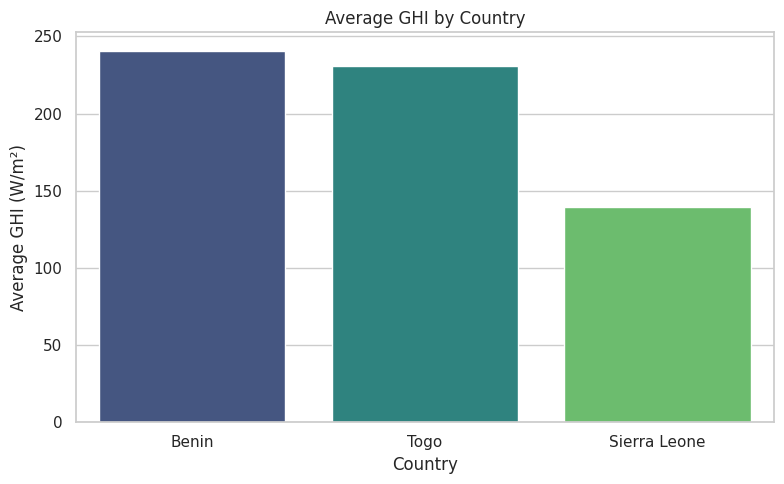

In [98]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis")
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


GHI represents the total solar radiation received per unit area on a horizontal surface. The average GHI (GHI_mean) shows how much solar energy is available, on average, at a location.Benin has the highest average GHI, followed closely by Togo, while Sierra Leone has significantly lower solar energy potential.

# This means Benin and Togo are better suited for solar energy harvesting than Sierra Leone, at least in terms of average available irradiance.